In [ ]:
# 데이콘 교육용 유튜브 강의및 코드 설명을 필사 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train=pd.read_csv('C:/Users/inha/Desktop/Fashion_MNIST/train.csv',index_col='index')
test=pd.read_csv('C:/Users/inha/Desktop/Fashion_MNIST/test.csv',index_col='index')
submission=pd.read_csv('C:/Users/inha/Desktop/Fashion_MNIST/sample_submission.csv',index_col='index')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 28*28 이라서 784+label 785개의 feature

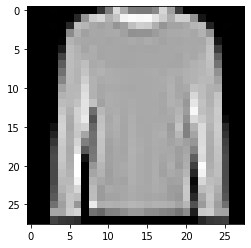

In [5]:
#하나의 데이터를 시각화 해보자....

img=np.array(train.iloc[81,1:]).reshape((28,28))  #28,28이미지이므로  
plt.imshow(img,cmap='gray')
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [7]:
train_df=pd.read_csv('C:/Users/inha/Desktop/Fashion_MNIST/train.csv')
test_df=pd.read_csv('C:/Users/inha/Desktop/Fashion_MNIST/test.csv')

In [8]:
#이미지 분석이므로 CNN사용해보자
#CNN을 사용하기 위해서는 먼저 데이터 가공이 필요(넘파이로 어레이화)


train_data = np.array(train_df.iloc[:,1:], dtype = 'float32')
test_data = np.array(test_df.iloc[:,1:], dtype='float32')


x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data/255

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [9]:
x_train.shape

(48000, 784)

In [10]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_val = x_val.reshape(x_val.shape[0],28,28,1)

In [23]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation = 'relu',input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [24]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [26]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=20,
    verbose=1,
    validation_data=(x_val,y_val),
)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 18s - loss: 0.8595 - acc: 0.7141 - val_loss: 0.5268 - val_acc: 0.8097
Epoch 2/20
48000/48000 [==============================] - 21s - loss: 0.4760 - acc: 0.8338 - val_loss: 0.4432 - val_acc: 0.8477
Epoch 3/20
48000/48000 [==============================] - 18s - loss: 0.4091 - acc: 0.8596 - val_loss: 0.3858 - val_acc: 0.8677
Epoch 4/20
48000/48000 [==============================] - 18s - loss: 0.3735 - acc: 0.8705 - val_loss: 0.3601 - val_acc: 0.8741
Epoch 5/20
48000/48000 [==============================] - 20s - loss: 0.3488 - acc: 0.8795 - val_loss: 0.3541 - val_acc: 0.8775
Epoch 6/20
48000/48000 [==============================] - 18s - loss: 0.3321 - acc: 0.8834 - val_loss: 0.3229 - val_acc: 0.8888
Epoch 7/20
48000/48000 [==============================] - 18s - loss: 0.3147 - acc: 0.8893 - val_loss: 0.3118 - val_acc: 0.8923
Epoch 

In [27]:
y_pred = cnn_model.predict_classes(x_test)

 9568/10000 [===========================>..] - ETA: 0s

In [29]:
submission = pd.read_csv('C:/Users/inha/Desktop/Fashion_MNIST/sample_submission.csv', encoding = 'utf-8')
submission['label'] = y_pred
submission.to_csv('C:/Users/inha/Desktop/Fashion_MNIST/fashion_submission.csv', index = False)